In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [29]:
background = cv2.imread('image/merge.jpg')
daisy = cv2.imread('image/daisy.png', cv2.IMREAD_UNCHANGED)

In [30]:
daisy.shape

(720, 720, 4)

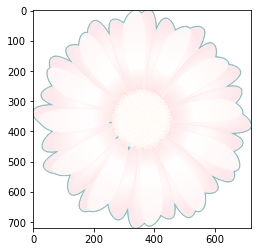

In [31]:
plt.imshow(daisy[:,:,::-1])

In [32]:
daisy = cv2.resize(daisy, dsize=(180, 180), interpolation=cv2.INTER_AREA)

In [33]:
background.shape, daisy.shape

((2160, 3840, 3), (180, 180, 4))

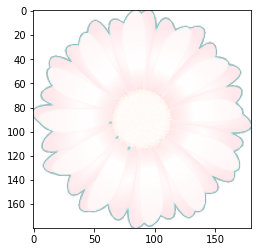

In [34]:
plt.imshow(daisy[:,:,::-1])

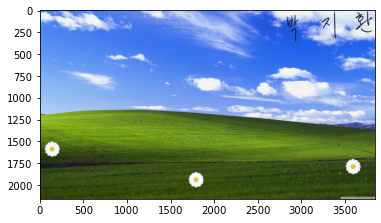

In [35]:
h, w, c = daisy.shape
mask = daisy[:,:,3]
mask_inv = cv2.bitwise_not(mask)

bgr_daisy = daisy[:,:,:3]

bg1 = background[1500:1500+h, 50:50+w]
bg2 = background[1850:1850+h, 1700:1700+w]
bg3 = background[1700:1700+h, 3500:3500+w]

fg = cv2.bitwise_and(bgr_daisy, bgr_daisy, mask=mask)
bg1 = cv2.bitwise_and(bg1, bg1, mask=mask_inv)
bg2 = cv2.bitwise_and(bg2, bg2, mask=mask_inv)
bg3 = cv2.bitwise_and(bg3, bg3, mask=mask_inv)

img1 = fg + bg1
img2 = fg + bg2
img3 = fg + bg3

back = background.copy()

back[1500:1500+h, 50:50+w] = img1
back[1850:1850+h, 1700:1700+w] = img2
back[1700:1700+h, 3500:3500+w] = img3

plt.imshow(back[:,:,::-1])